# Quick Start

`tsaug` provides a set of time series augmentation methods. Every method has two implementations: a function and and a class. All methods support augmentation of time series as well as associated labels if exist. All methods support *multi-channel* time series and *multi-class* labels.

## Augmentation Functions

An augmentation function is a convenient way to apply a certain augmentation method to time series.

In [1]:
import numpy as np
X, Y = np.load("quickstart.npy")

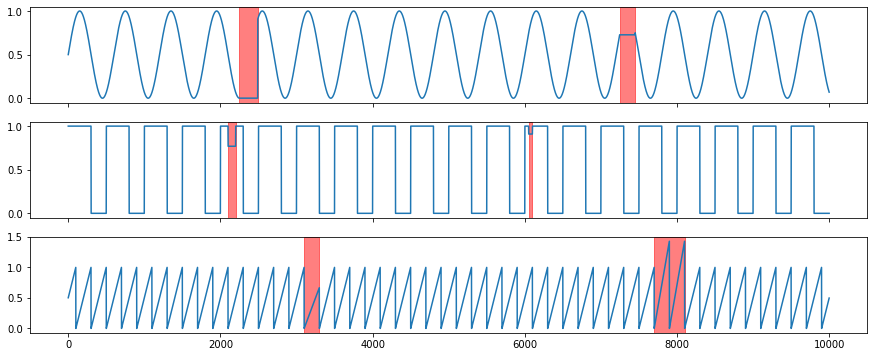

In [2]:
from tsaug.visualization import plot
%matplotlib inline

plot(X, Y)

In [3]:
from tsaug import random_time_warp
X_aug, Y_aug = random_time_warp(X, Y)

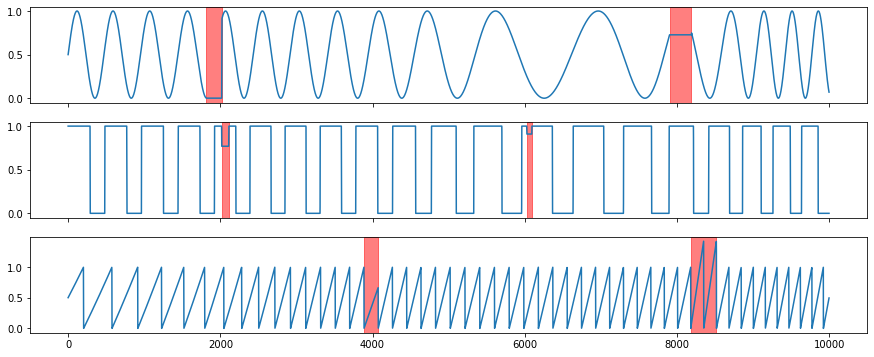

In [4]:
plot(X_aug, Y_aug)

## Augmentation Classes

Every augmentation function has its counterpart class. Using an individual augmentation object is equivalent to using its counterpart augmentation function. In practice, it is common to apply multiple augmentation methods together to obtain a comprehensive data set. Augmentation classes provide a simple way to combine multiple augmentation objects.

Operator `+` connects multiple augmentors sequentially. Operator `*` sets an augmentor to create multiple versions of augmented series by applying the augmentor to the same input series multiple times in parallel. Operator `@` sets an augmentor to be applied with certain probability.

In [5]:
from tsaug import RandomTimeWarp, RandomMagnify, RandomJitter, RandomTrend
my_aug = (
    RandomMagnify(max_zoom=4.0, min_zoom=2.0) * 2
    + RandomTimeWarp() * 2
    + RandomJitter(strength=0.1) @ 0.5
    + RandomTrend(min_anchor=-0.5, max_anchor=0.5) @ 0.5
)
X_aug, Y_aug = my_aug.run(X, Y)

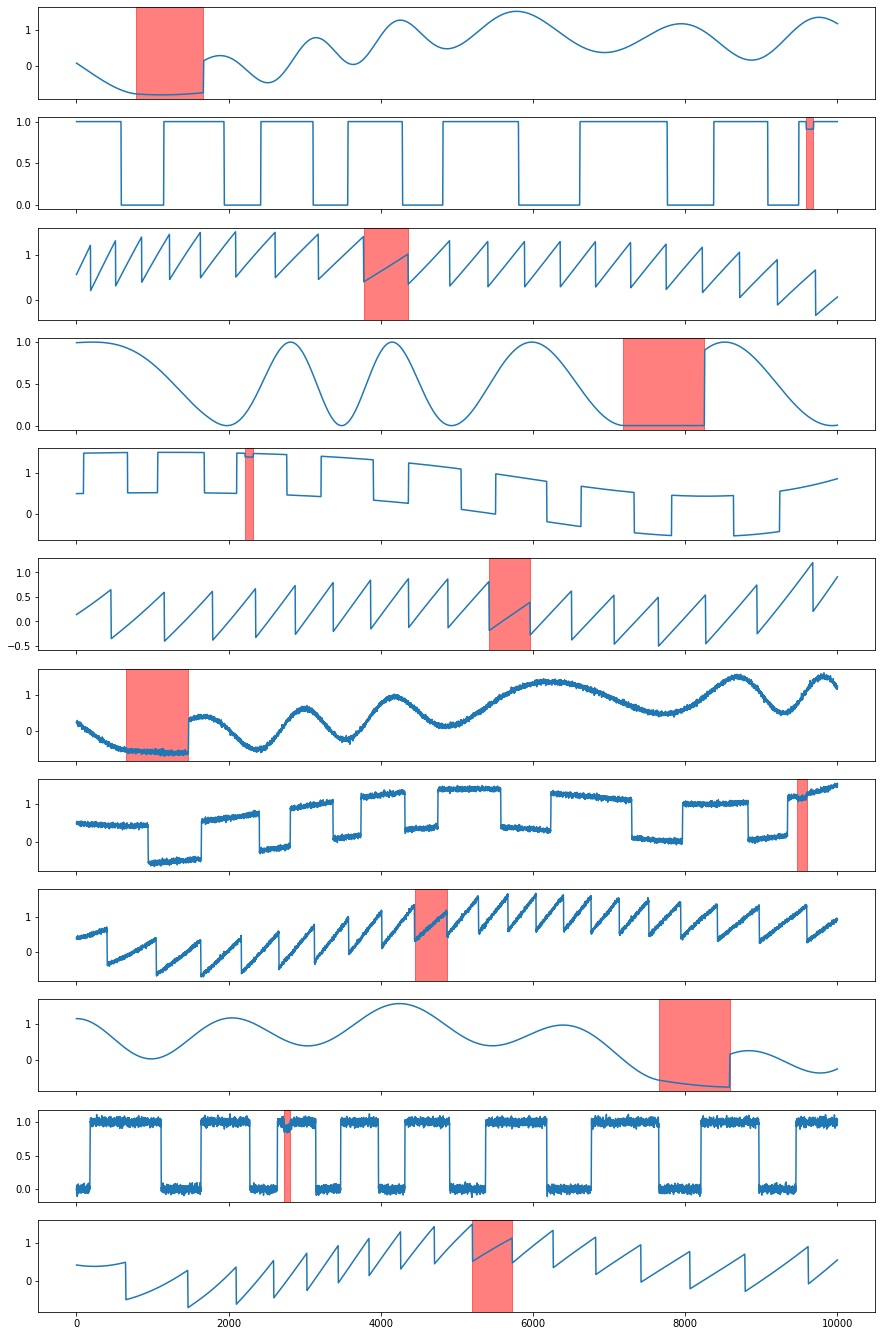

In [6]:
plot(X_aug, Y_aug)

All augmentor objects have a method `summary` that prints out key information.

In [7]:
my_aug.summary()

Augmentor 	 M 	 Prob 	 Output Size 	 Params
RandomMagnify 	 2 	 1.0 	 (2N, n, c) 	 {'max_zoom': 4.0, 'min_zoom': 2.0, 'random_seed': None}
RandomTimeWarp 	 2 	 1.0 	 (4N, n, c) 	 {'n_speed_change': 3, 'random_seed': None}
RandomJitter 	 1 	 0.5 	 (4N, n, c) 	 {'dist': 'normal', 'strength': 0.1, 'random_seed': None}
RandomTrend 	 1 	 0.5 	 (4N, n, c) 	 {'num_anchors': 5, 'min_anchor': -0.5, 'max_anchor': 0.5, 'random_seed': None}
